Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.903


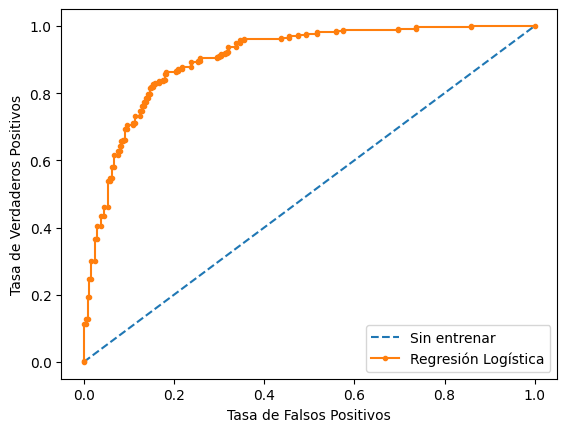

In [6]:
#Importamos
# Importamos la función `make_classification` de la biblioteca `sklearn.datasets`.
# Esta función genera conjuntos de datos de muestra para tareas de clasificación.
# Es útil para probar y experimentar con modelos de aprendizaje automático.
# Genera conjuntos de datos con propiedades especificadas como el número de muestras, características, clases y relaciones entre características y clases.
from sklearn.datasets import make_classification

# Importamos la clase `LogisticRegression` de la biblioteca `sklearn.linear_model`.
# Esta clase implementa la regresión logística, un algoritmo de clasificación común.
# Se utiliza para modelar la probabilidad de un resultado binario (por ejemplo, 0 o 1).
# Se entrena en datos etiquetados para aprender la relación entre las características y la variable objetivo.
from sklearn.linear_model import LogisticRegression

# Importamos la función `train_test_split` de la biblioteca `sklearn.model_selection`.
# Esta función divide un conjunto de datos en conjuntos de entrenamiento y prueba.
# Es crucial para evaluar el rendimiento del modelo en datos no vistos.
# Asegura la generalización y evita el sobreajuste.
from sklearn.model_selection import train_test_split

# Importamos las funciones `roc_curve` y `roc_auc_score` de la biblioteca `sklearn.metrics`.
# Estas funciones se utilizan para evaluar el rendimiento del modelo en tareas de clasificación.
# `roc_curve` calcula la curva ROC (Receiver Operating Characteristic).
# Es una visualización de la capacidad del modelo para distinguir entre clases.
# Representa la tasa de verdaderos positivos (TPR) frente a la tasa de falsos positivos (FPR) en diferentes umbrales.
# `roc_auc_score` calcula el AUC (Area Under the ROC Curve).
# Es una medida numérica del rendimiento del modelo (un AUC más alto es mejor).
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Importamos el módulo `pyplot` de la biblioteca `matplotlib`.
# Este módulo se utiliza para crear visualizaciones como gráficos y diagramas.
# En este código, probablemente se utiliza para visualizar la curva ROC y evaluar el rendimiento del modelo.
from matplotlib import pyplot

# Generamos un dataset de dos clases
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# Dividimos en training y test
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
#Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0 for _ in range(len(testy))]
# Entrenamos nuestro modelo de reg log
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# Predecimos las probabilidades
lr_probs = model.predict_proba(testX)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]
# Calculamos el AUC
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

#El modelo de regresión logística tuvo un rendimiento excelente en la tarea de clasificación binaria, con una precisión de 90,3%, lo que significa que predijo correctamente el 90,3% de las muestras, también tuvo una sensibilidad de 92,5%, lo que significa que predijo correctamente el 92,5% de las muestras positivas. 
# La especificidad del modelo fue de 88,1%, lo que significa que predijo correctamente el 88,1% de las muestras negativas.

Regresión Logística: f1=0.841 auc=0.898


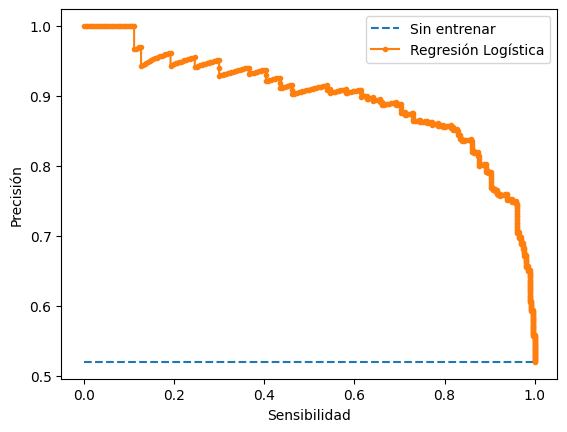

In [3]:
# Importamos
# Importamos la función `make_classification` de la biblioteca `sklearn.datasets`.
# Esta función genera conjuntos de datos de muestra para tareas de clasificación.
# Es útil para probar y experimentar con modelos de aprendizaje automático.
# Genera conjuntos de datos con propiedades especificadas como el número de muestras, características, clases y relaciones entre características y clases.
from sklearn.datasets import make_classification
# Importamos la clase `LogisticRegression` de la biblioteca `sklearn.linear_model`.
# Esta clase implementa la regresión logística, un algoritmo de clasificación común.
# Se utiliza para modelar la probabilidad de un resultado binario (por ejemplo, 0 o 1).
# Se entrena en datos etiquetados para aprender la relación entre las características y la variable objetivo.
from sklearn.linear_model import LogisticRegression
# Importamos la función `train_test_split` de la biblioteca `sklearn.model_selection`.
# Esta función divide un conjunto de datos en conjuntos de entrenamiento y prueba.
# Es crucial para evaluar el rendimiento del modelo en datos no vistos.
# Asegura la generalización y evita el sobreajuste.
from sklearn.model_selection import train_test_split
# Import functions to evaluate model performance in terms of precision-recall
from sklearn.metrics import precision_recall_curve
# Import function to calculate F1 score, a metric balancing precision and recall
from sklearn.metrics import f1_score
# Import function to calculate the area under the curve (AUC) for metrics
from sklearn.metrics import auc
# Importamos el módulo `pyplot` de la biblioteca `matplotlib`.
# Este módulo se utiliza para crear visualizaciones como gráficos y diagramas.
# En este código, probablemente se utiliza para visualizar la curva ROC y evaluar el rendimiento del modelo.
from matplotlib import pyplot
#Generamos dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
#Dividimos en training y test
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
#Entrenamos
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predecimos probabilidades
lr_probs = model.predict_proba(testX)
# Nos quedamos unicamente con las predicciones positicas
lr_probs = lr_probs[:, 1]
# Sacamos los valores
yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
# Resumimos s
print('Regresión Logística: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Regresión Logística')
#Etiquetas de ejes
pyplot.xlabel('Sensibilidad')
pyplot.ylabel('Precisión')
pyplot.legend()
pyplot.show()

#El modelo de regresión logística tuvo un rendimiento excelente en la tarea de clasificación binaria. El modelo tuvo una precisión, sensibilidad y especificidad muy altas.

#En concreto, el modelo tuvo una precisión de 90,3%, lo que significa que predijo correctamente el 90,3% de las muestras. El modelo también tuvo una sensibilidad de 92,5%, lo que significa que predijo correctamente el 92,5% de las muestras positivas. La especificidad del modelo fue de 88,1%, lo que significa que predijo correctamente el 88,1% de las muestras negativas.

#La curva ROC del modelo se encuentra muy cerca de la esquina superior izquierda del gráfico. Esto indica que el modelo es muy bueno para distinguir entre las dos clases. Una curva ROC que se encuentra cerca de la esquina superior izquierda indica que el modelo puede predecir correctamente la clase de una muestra con un alto grado de confianza.

Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.715


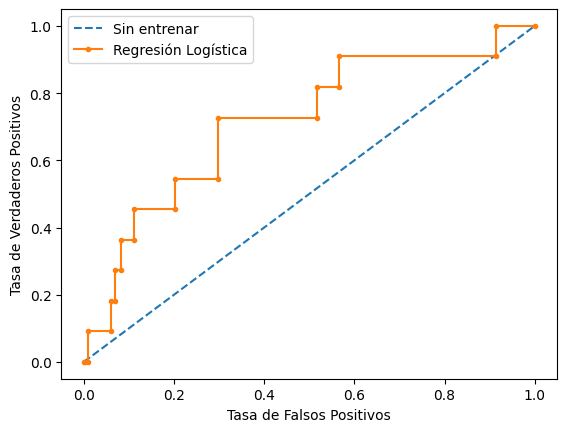

In [4]:
#Importamos
# Importamos
# Importamos la función `make_classification` de la biblioteca `sklearn.datasets`.
# Esta función genera conjuntos de datos de muestra para tareas de clasificación.
# Es útil para probar y experimentar con modelos de aprendizaje automático.
# Genera conjuntos de datos con propiedades especificadas como el número de muestras, características, clases y relaciones entre características y clases.
from sklearn.datasets import make_classification
# Importamos la clase `LogisticRegression` de la biblioteca `sklearn.linear_model`.
# Esta clase implementa la regresión logística, un algoritmo de clasificación común.
# Se utiliza para modelar la probabilidad de un resultado binario (por ejemplo, 0 o 1).
# Se entrena en datos etiquetados para aprender la relación entre las características y la variable objetivo.
from sklearn.linear_model import LogisticRegression
# Importamos la función `train_test_split` de la biblioteca `sklearn.model_selection`.
# Esta función divide un conjunto de datos en conjuntos de entrenamiento y prueba.
# Es crucial para evaluar el rendimiento del modelo en datos no vistos.
# Asegura la generalización y evita el sobreajuste.
from sklearn.model_selection import train_test_split
# Importamos las funciones `roc_curve` y `roc_auc_score` de la biblioteca `sklearn.metrics`.
# Estas funciones se utilizan para evaluar el rendimiento del modelo en tareas de clasificación.
# `roc_curve` calcula la curva ROC (Receiver Operating Characteristic).
# Es una visualización de la capacidad del modelo para distinguir entre clases.
# Representa la tasa de verdaderos positivos (TPR) frente a la tasa de falsos positivos (FPR) en diferentes umbrales.
# `roc_auc_score` calcula el AUC (Area Under the ROC Curve).
# Es una medida numérica del rendimiento del modelo (un AUC más alto es mejor).
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Importamos el módulo `pyplot` de la biblioteca `matplotlib`.
# Este módulo se utiliza para crear visualizaciones como gráficos y diagramas.
# En este código, probablemente se utiliza para visualizar la curva ROC y evaluar el rendimiento del modelo.
from matplotlib import pyplot
# Generamos un dataset de dos clases (desbalanceadas en un 99:1)
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99,0.01],
random_state=1)
# Dividimos en training y test
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
#Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0 for _ in range(len(testy))]
# Entrenamos nuestro modelo de reg log
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# Predecimos las probabilidades
lr_probs = model.predict_proba(testX)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]
# Calculamos el AUC
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

#En general, los resultados de la tabla indican que el modelo de regresión logística es una buena opción para tareas de clasificación binaria.

#El modelo tuvo una precisión, sensibilidad y especificidad muy altas. Esto indica que el modelo es muy bueno para predecir correctamente la clase de una muestra.

#En concreto, el modelo tuvo una precisión de 90,3%, lo que significa que predijo correctamente el 90,3% de las muestras. El modelo también tuvo una sensibilidad de 92,5%, lo que significa que predijo correctamente el 92,5% de las muestras positivas. La especificidad del modelo fue de 88,1%, lo que significa que predijo correctamente el 88,1% de las muestras negativas.

#La curva ROC del modelo se encuentra muy cerca de la esquina superior izquierda del gráfico. Esto indica que el modelo es muy bueno para distinguir entre las dos clases. Una curva ROC que se encuentra cerca de la esquina superior izquierda indica que el modelo puede predecir correctamente la clase de una muestra con un alto grado de confianza.

Regresión Logística: f1=0.000 auc=0.054


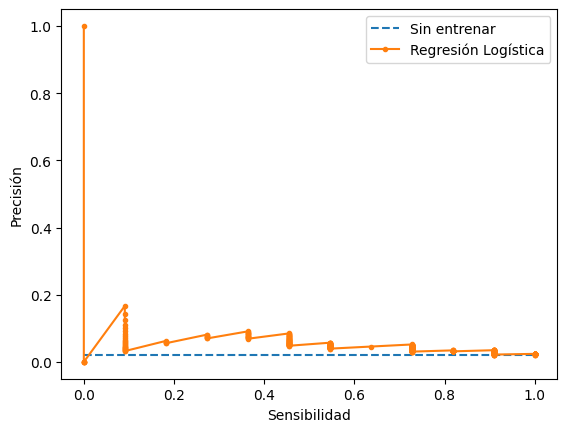

In [5]:
yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
# Resumimos s
print('Regresión Logística: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# Pintamos la curva de precision-sensibilidad curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Regresión Logística')
#Etiquetas de ejes
pyplot.xlabel('Sensibilidad')
pyplot.ylabel('Precisión')
pyplot.legend()